In [4]:
import pandas as pd
import numpy as np

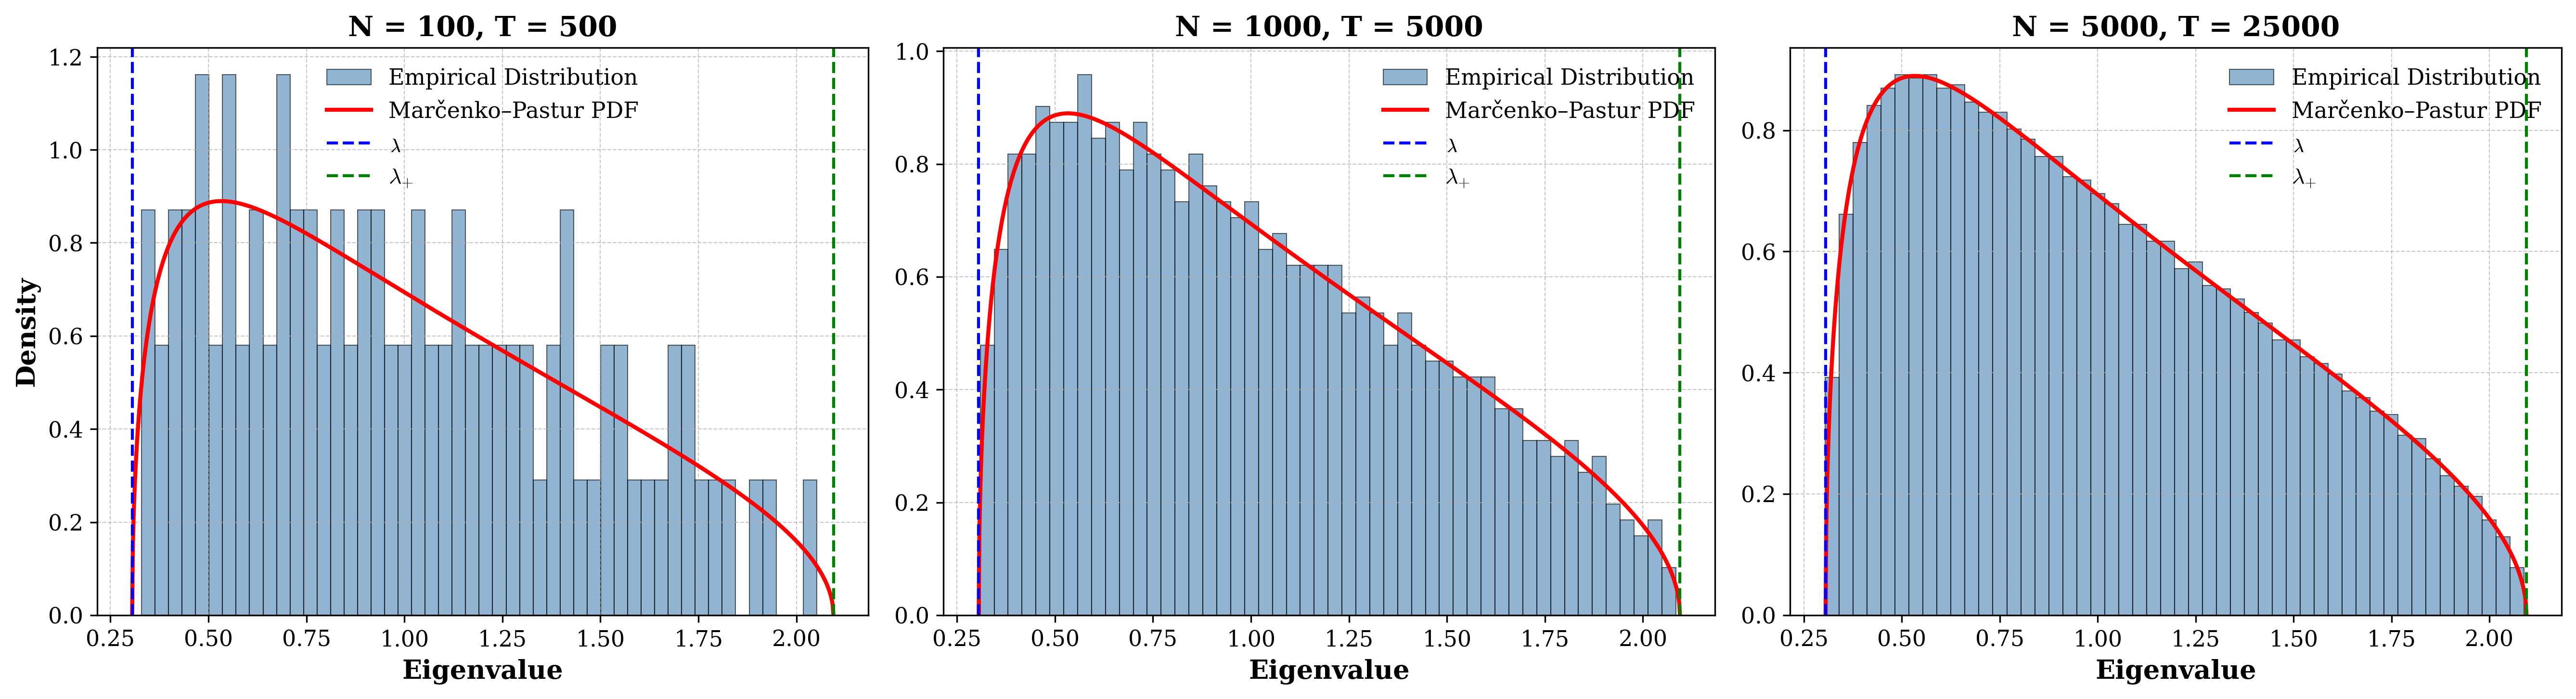

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define Marcenko–Pastur PDF
def marcenko_pastur_pdf(lambda_val, q):
    lambda_min = (1 - np.sqrt(1 / q))**2
    lambda_max = (1 + np.sqrt(1 / q))**2
    if lambda_min <= lambda_val <= lambda_max:
        return (q / (2 * np.pi * lambda_val)) * np.sqrt((lambda_max - lambda_val) * (lambda_val - lambda_min))
    else:
        return 0

# Plotting function
def plot_marcenko_pastur(N, T, subplot_position):
    # Generate random data and compute correlation matrix
    random_data = np.random.normal(size=(T, N))
    corr_matrix = np.corrcoef(random_data, rowvar=False)
    eigenvalues = np.linalg.eigvalsh(corr_matrix)

    # Parameters
    q = T / N
    lambda_min = (1 - np.sqrt(1 / q))**2
    lambda_max = (1 + np.sqrt(1 / q))**2

    lambda_values = np.linspace(lambda_min, lambda_max, 1000)
    mp_pdf = [marcenko_pastur_pdf(l, q) for l in lambda_values]

    # Plot
    plt.subplot(1, 3, subplot_position)
    plt.hist(eigenvalues, bins=50, density=True, alpha=0.6, color='steelblue', edgecolor='black', linewidth=0.5,
             label='Empirical Distribution')
    plt.plot(lambda_values, mp_pdf, color='red', linewidth=2.0, label='Marčenko–Pastur PDF')
    plt.axvline(lambda_min, color='blue', linestyle='--', linewidth=1.5, label=r'$\lambda_{-}$')
    plt.axvline(lambda_max, color='green', linestyle='--', linewidth=1.5, label=r'$\lambda_{+}$')

    plt.xlabel('Eigenvalue', fontsize=13, fontweight='bold')
    if subplot_position == 1:
        plt.ylabel('Density', fontsize=13, fontweight='bold')
    plt.title(f'N = {N}, T = {T}', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=11, frameon=False)

# Set up figure
plt.figure(figsize=(18, 5), dpi=300)

# Subplots for different N and T
plot_marcenko_pastur(N=100, T=500, subplot_position=1)
plot_marcenko_pastur(N=1000, T=5000, subplot_position=2)
plot_marcenko_pastur(N=5000, T=25000, subplot_position=3)

plt.tight_layout()
plt.savefig('marcenko_pastur_distribution.png', dpi=300)
plt.show()


In [6]:
random_matrix = np.random.normal(size=(10, 5))
corr_matrix = np.corrcoef(random_matrix, rowvar=False) #By specifying rowvar=False, you are telling np.corrcoef to treat the columns as the variables 
corr_matrix.shape

(5, 5)

# The adjustment factor T/N​ is critical for adapting the Marcenko-Pastur distribution to the specific case of correlation matrices derived from random time series (or random variables). This factor:

    Corrects for the finite sample size of the empirical correlation matrix.

    Ensures the eigenvalue spectrum is correctly scaled to reflect the structured correlations between the variables, as opposed to the independent entries assumed in general random matrices.

    Makes the distribution more accurate for real world data, where the correlations between variables must be taken into account.

* ##  Eigenvalues larger than λ+​ are considered meaningful because they reflect real structure in the data,because they suggest that the data exhibits MORE correlation or dependency between variables than random noise would explain.


* ##  Eigenvalues smaller than λ− are viewed as noise because they do not contribute significantly to explaining the variability in the data, and are usually treated as statistical outliers. These eigenvalues correspond to eigenvectors that are associated with minor variations in the data that cannot be attributed to any systematic or inherent structure